# Проект "интернет-магазин Стримчик"

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Цель проекта:

**Выявить закономерности определяющие успешность игры, на их основе спланировать рекламную компанию для 2017**

        - популярные и перспективные платформы
        - популярные жанры
        - влияние региона на продажи
        - влияние оценок критиков и игроков на продажи

# Краткий план выполнения проекта:

**Привести данные к нужным типам, исправить ошибки в таблицах;**



**Исследовательский анализ данных;**

    - сколько игр выпускалось и выручка по годам
    - сколько было продаж по разным платформам
    - характерный срок появления новых и исчезновение старых платформ
        
        
                
**Портрет пользователя каждого региона;**

    - самые популярные платформы (топ-5)
    - самые популярные жанры (топ-5)
    - влияет ли рейтинг ESRB на продажи в отдельном регионе
                
                
                
**Проверка гипотез;**

    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - средние пользовательские рейтинги жанров Action и Sports разные
        
        
        
**Общий вывод и реккомендации.**

## Изучение данных

In [22]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import random

In [23]:
# открываем файл
try:
    df = pd.read_csv('/jupyter-notebook/Project5/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [24]:
# первые 5 строк
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [25]:
# 5 строк с хвоста
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [26]:
# случайные 5 строк
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9257,Pet Pals: Animal Doctor,Wii,2008.0,Simulation,0.13,0.00,0.00,0.01,NaN,tbd,E10+
7173,Spirit Camera: The Cursed Memoir,3DS,2012.0,Adventure,0.13,0.02,0.06,0.01,54.0,6.1,T
638,LEGO Harry Potter: Years 1-4,Wii,2010.0,Action,1.28,0.93,0.00,0.22,79.0,8,E10+
3664,Lips: Number One Hits,X360,2009.0,Misc,0.15,0.34,0.00,0.06,70.0,7.6,T
5529,Samurai Warriors 2: Xtreme Legends (JP sales),PS2,2007.0,Action,0.00,0.00,0.33,0.00,NaN,NaN,NaN


In [27]:
# метод дискрайб
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16446.0,NaN,NaN,NaN,2006.484616,5.87705,1980.0,2003.0,2007.0,2010.0,2016.0
Genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_sales,16715.0,NaN,NaN,NaN,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,NaN,NaN,NaN,0.14506,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,NaN,NaN,NaN,0.077617,0.308853,0.0,0.0,0.0,0.04,10.22
Other_sales,16715.0,NaN,NaN,NaN,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,NaN,NaN,NaN,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0
User_Score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# метод инфо
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод:
- много пропусков в колонках: оценка критиков, игроков и в возрастном рейтинге игры, скорее всего связано с непопулярностью игр
- неверный формат user_score
- неверный регистр колонок

## Предобработка данных

### Замена назавние колонок

In [29]:
# название слонок к нижнему регистру
df.columns = df.columns.str.lower()

In [30]:
# изменим название колонки год
df.columns = ['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales',
              'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

### Данные в нужный тип

In [31]:
# год релиза в тип дата
df['year'] = df['year'].astype('Int32')

в колонке дата релиза, стоит только год, чтобы был нормальный вывод этой колонки на графиках и не приходилось постоянно исправлять для каждой таблицы или графика. Перевел просто в числовой формат, вместо даты.

In [32]:
# колличество продаж в дробный формат float32 для экономии памяти
df['na_sales'] = df['na_sales'].astype('float32')
df['eu_sales'] = df['eu_sales'].astype('float32')
df['jp_sales'] = df['jp_sales'].astype('float32')
df['other_sales'] = df['other_sales'].astype('float32')

In [33]:
# если нет оценки, скорее всего в нее никто не играл, зманим на 0
df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna(0)

In [34]:
# в дробный тип + экономия памяти
df['critic_score'] = df['critic_score'].astype('float32')

**ЧТО ОЗНАЧАЕТ "TBD"?**

- Чтобы гарантировать, что METASCORES точно отражает отзывы критиков о каком-либо конкретном фильме, игре, телешоу или альбоме, мы не отображаем METASCORES для тех элементов, которые не имеют по крайней мере четырех (4) отзывов в нашей базе данных. Как только будет достигнуто это минимальное количество отзывов, отобразится METASCORE.

**Мы можем заменить 'TBD' на 0**

In [35]:
# заменим tbs на 0
df.loc[df['user_score'] == 'tbd', 'user_score'] = 0

In [36]:
# заменим на дробный тип данных
df['user_score'] = df['user_score'].astype('float32')

In [37]:
# суммарыне продажи
df['revenue'] = df['na_sales'] + df['eu_sales'] + \
    df['jp_sales'] + df['other_sales']

#### Вывод:
- типы данных изменены 
- строковое значение в колонке user_score заменено
- создана колонка с общей выручкой
- год заменен на int для удобства отобржения на графиках


- возможно так много пропусков в колонках user_score< critic_score, потому что не все игры стали популярными. В некоторые вообще никто не играл. Так же стоит учесть, что у нас начало это 1980, на то время не у всех был компьютер чтобы где то оставить отзыв, поэтому отзывы появились гораздо позже и у тех игр, что стали хитами.
- TBS заменена на 0, они не отражают рейтинг пока игра не наберет 4 отзыва.


## Исследовательский анализ данных

### Cколько игр выпускалось и выручка по годам

In [38]:
# таблица выручки по годам
year_revenue = df.groupby('year')['revenue'].agg(
    ['count', 'sum']).reset_index()
year_revenue.head()

,year,count,sum
0,1980,9,11.380000
1,1981,46,35.680000
2,1982,36,28.879999
3,1983,17,16.799999
4,1984,14,50.349998


In [40]:
# словарь по названию игр и году
game_dict = df[['name', 'year']]
game_dict = game_dict.drop_duplicates()
game_dict = game_dict.dropna().reset_index(drop=True)
game_dict.head()

,name,year
0,Wii Sports,2006
1,Super Mario Bros.,1985
2,Mario Kart Wii,2008
3,Wii Sports Resort,2009
4,Pokemon Red/Pokemon Blue,1996


In [41]:
# группировка по колличеству игр
game_count = game_dict.groupby('year')['name'].count().reset_index()
game_count.head()

,year,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


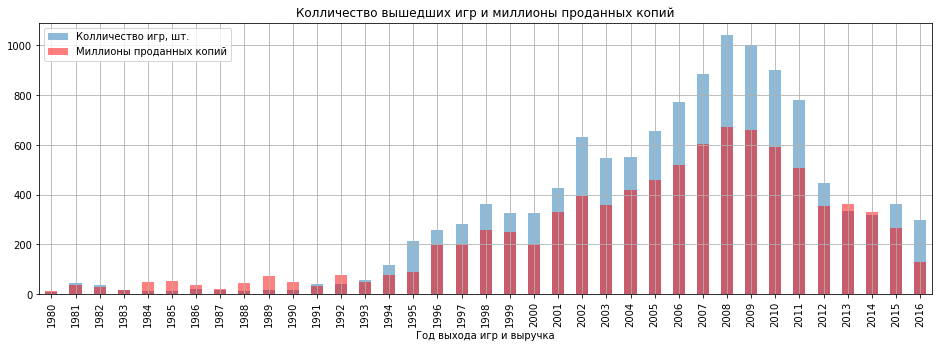

In [42]:
# колличество игр и выручка по годам
ax = game_count.plot(x='year', y='name', figsize=(16, 5),
                     grid=True, kind='bar', alpha=.5)
year_revenue.plot(x='year', y='sum', figsize=(16, 5),
                  grid=True, kind='bar', alpha=.5, color='red', ax=ax)

plt.title('Колличество вышедших игр и миллионы проданных копий')
plt.legend(['Колличество игр, шт.', 'Миллионы проданных копий'])
plt.xlabel('Год выхода игр и выручка')
plt.show()

#### Вывод:

- До 1993 года выпускалось меньше 50 игр в год.
- Пик по выпуску игр пришелся на 2008 и 2009 года. 
- С 2010 года колличество игр выпускается все меньше и меньше.
- Для моего анализа, стоит взять данные начиная с 2012, именно в период с 2012 до 2016 ситуация стабильна после большого спада. 
- Стоит отметить что в 2016 выручка упала в 2 раза, хотя колличество игр не изменилось.

### Сколько было продаж по разным платформам

In [43]:
# таблица выручки и колличества выпущеных игр по платформам
platform_rev = df.groupby('platform')['revenue'].agg(
    ['count', 'sum']).reset_index()
platform_rev.head()

,platform,count,sum
0,2600,133,96.980003
1,3DO,3,0.100000
2,3DS,520,259.000000
3,DC,52,15.950000
4,DS,2151,806.119995


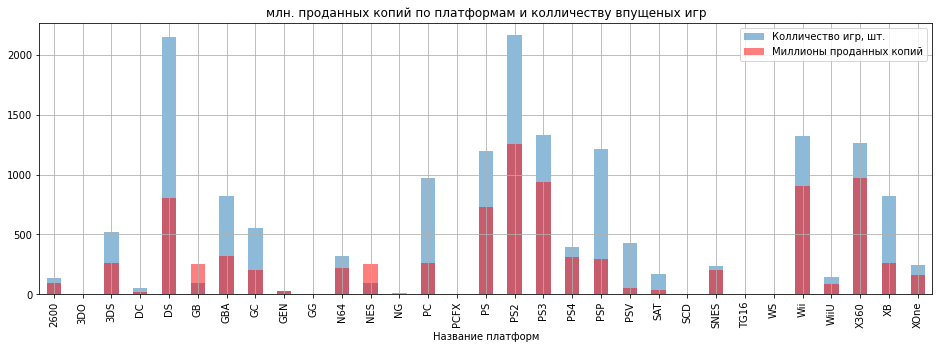

In [44]:
# график выручки по платформам и колличеству впущеных игр
ax = platform_rev.plot(x='platform', y='count', figsize=(
    16, 5), grid=True, kind='bar', alpha=.5)
platform_rev.plot(x='platform', y='sum', figsize=(16, 5),
                  grid=True, kind='bar', alpha=.5, ax=ax, color='red')

plt.title('млн. проданных копий по платформам и колличеству впущеных игр')
plt.xlabel('Название платформ')
plt.legend(['Колличество игр, шт.', 'Миллионы проданных копий'])
plt.show()

#### Вывод:

- следует взять плтаформы где суммарная выручка превышает 500 млн. для них построим распредление по годам.

### Характерный срок появления новых и исчезновение старых платформ

In [45]:
# таблица платформ где сум продаж более 500
list_top = df.groupby('platform')['revenue'].agg(['sum']).reset_index()
list_top = list_top.query('sum > 500')
list_top

,platform,sum
4,DS,806.119995
15,PS,730.859985
16,PS2,1255.770020
17,PS3,939.649963
26,Wii,907.510010
28,X360,971.419983


In [46]:
# в виде списка
list_top = list_top['platform'].tolist()
list_top

['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']

In [47]:
# таблица платформ сум прод более 500
top_platform = (df.query('platform == @list_top')
                .pivot_table(index='year', values='revenue', columns='platform', aggfunc=['sum'])
                .reset_index()
                .fillna(0)
                )
top_platform.sample(5)

year         sum                                            \
platform                DS          PS   PS2         PS3         Wii   
6         1999    0.000000  144.529999   0.0    0.000000    0.000000   
16        2009  119.540001    0.000000  26.4  130.930008  206.970001   
21        2014    0.000000    0.000000   0.0   47.759998    3.750000   
4         1997    0.000000  136.169998   0.0    0.000000    0.000000   
23        2016    0.000000    0.000000   0.0    3.600000    0.180000   

                      
platform        X360  
6           0.000000  
16        120.290001  
21         34.740002  
4           0.000000  
23          1.520000

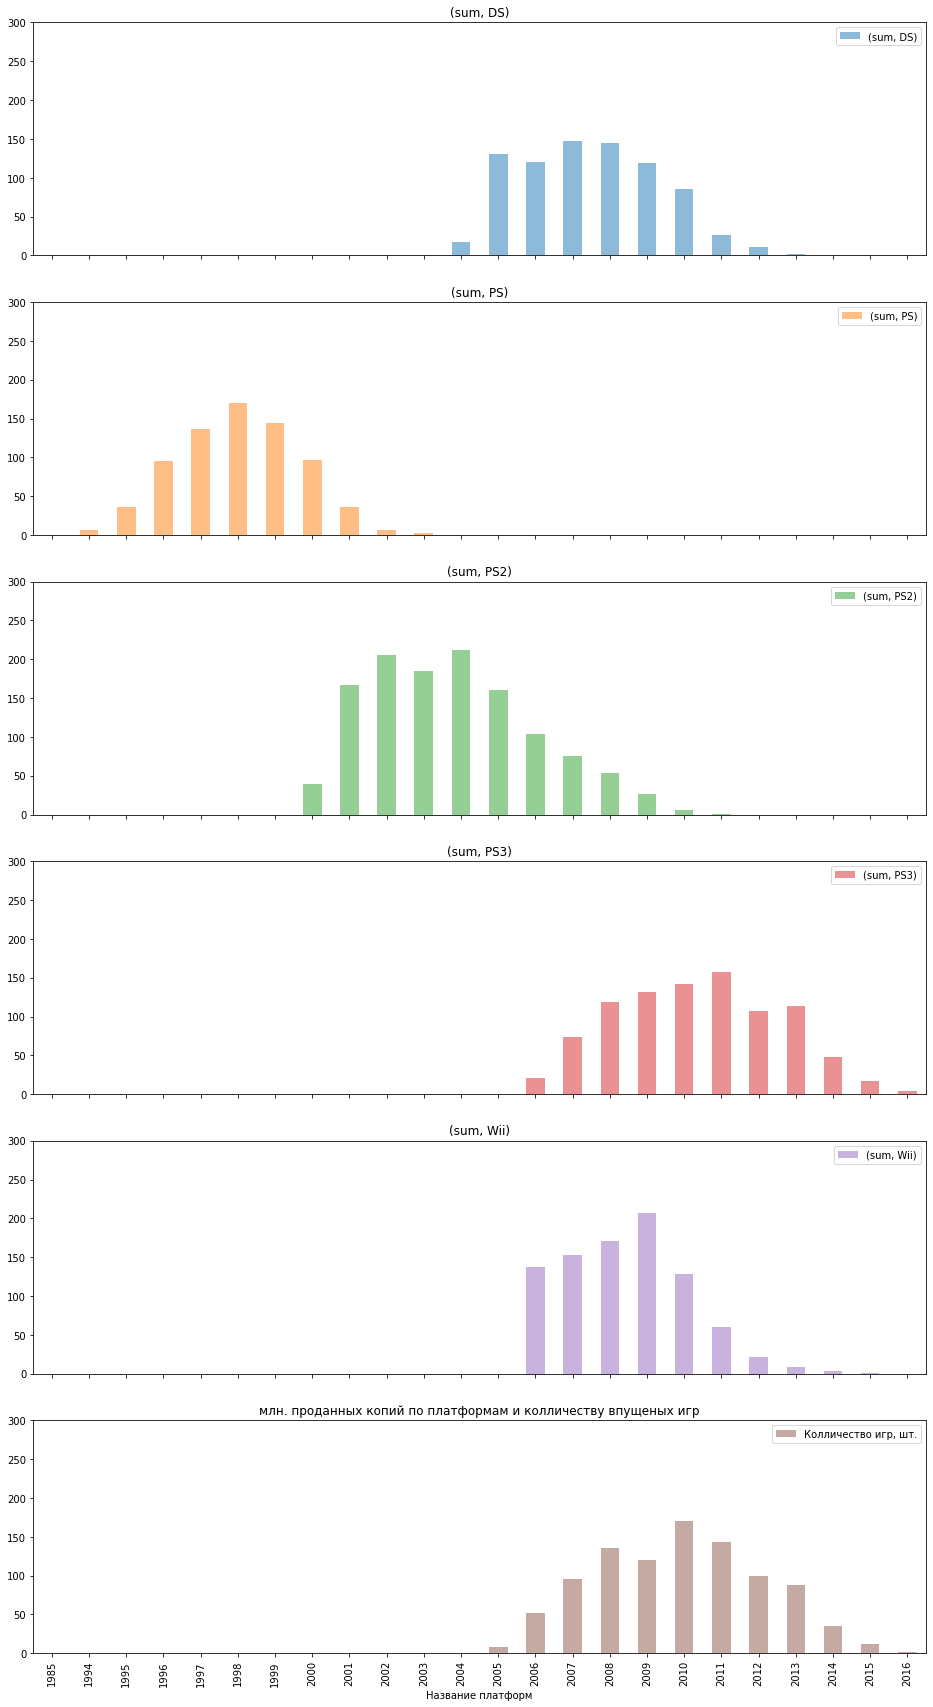

In [48]:
# графики платформ с сум выручкой более 500 по годам
axes = top_platform.plot.bar(x='year', figsize=(
    16, 30), subplots=True, alpha=.5, ylim=(0, 300))

plt.show()

#### Вывод:

- с момента выхода новой консоли и ухода ее с рынка проходит около 10 лет
- на выходе платформа показывает малое колличество продаж (исключение Wii). Возможно это связано с тем, что старт продаж начинается зимой перед новым годом. 
- на рекламные компании Wii стоит обратить внимание, высокий старт продаж на выходе

### Опредление актуального периода

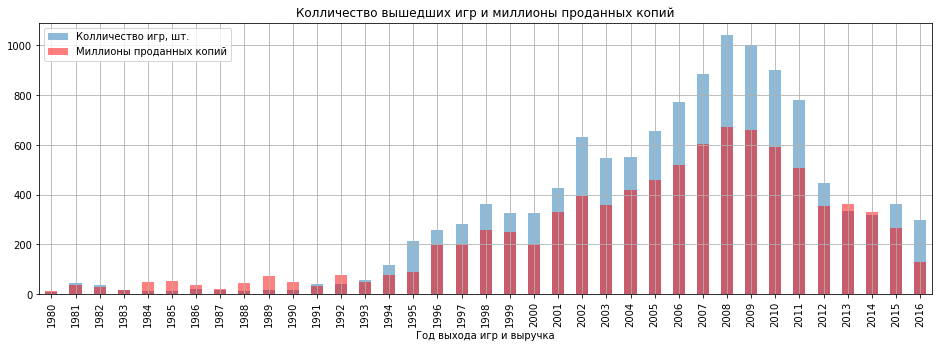

In [27]:
# повтор графика из пункта 3.1
ax = game_count.plot(x='year', y='name', figsize=(16, 5),
                     grid=True, kind='bar', alpha=.5)
year_revenue.plot(x='year', y='sum', figsize=(16, 5),
                  grid=True, kind='bar', alpha=.5, color='red', ax=ax)

plt.title('Колличество вышедших игр и миллионы проданных копий')
plt.legend(['Колличество игр, шт.', 'Миллионы проданных копий'])
plt.xlabel('Год выхода игр и выручка')
plt.show()

#### Вывод:
- первый период который я выделю - 2012 по 2016 год. На основе графика колличества и выручки от игр, где мы видим сильный спад после 2011 года по колличеству игр. 
- второй период - 2016 год колличество игр не изменилось, а вот выручка от игр упала в 2 раза по сравнению с 2015. 

**Актуальный период с 2012 по 2016.**

### Какие платформы лидируют по продажам

In [28]:
# создадим таблицу того периода что выбрали
actual_df = df.query('year > 2011').reset_index(drop=True)
actual_df.sample(5)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
1777,Dark Souls III,PC,2016,Role-Playing,0.00,0.07,0.00,0.00,89.0,8.6,M,0.07
1694,Transformers: Devastation,PS3,2015,Action,0.03,0.04,0.00,0.01,0.0,7.1,T,0.08
1749,Aikatsu! My No.1 Stage!,3DS,2015,Misc,0.00,0.00,0.08,0.00,0.0,0.0,NaN,0.08
1518,Batman: Return to Arkham,XOne,2016,Action,0.05,0.05,0.00,0.01,77.0,8.2,T,0.11
328,The Legend of Zelda: Twilight Princess HD,WiiU,2016,Action,0.56,0.30,0.08,0.09,86.0,8.4,T,1.03


In [29]:
# таблица платформ по актуальному периоду
plt_actual = (actual_df
              .pivot_table(index='year', values='revenue', columns='platform', aggfunc=['sum'])
              .fillna(0)
              .reset_index()
              .sort_values(by='year', ascending=False)
              )

plt_actual.columns = ['year', '3DS', 'DS', 'PC', 'PS3',
                      'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
plt_actual['year'] = plt_actual['year'].astype(str)
plt_actual

,year,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
4,2016,15.140000,0.00,5.250000,3.600000,69.250000,0.00,4.250000,0.180000,4.600000,1.520000,26.150000
3,2015,27.780001,0.00,8.520000,16.820000,118.900002,0.12,6.250000,1.140000,16.350000,11.960000,60.139999
2,2014,43.759998,0.00,13.280001,47.759998,100.000000,0.24,11.900000,3.750000,22.030001,34.740002,54.070000
1,2013,56.570000,1.54,12.380000,113.250000,25.990000,3.14,10.590000,8.590000,21.650000,88.580002,18.960001
0,2012,51.360001,11.01,23.219999,107.360001,0.000000,7.69,16.190001,21.710001,17.559999,99.739998,0.000000


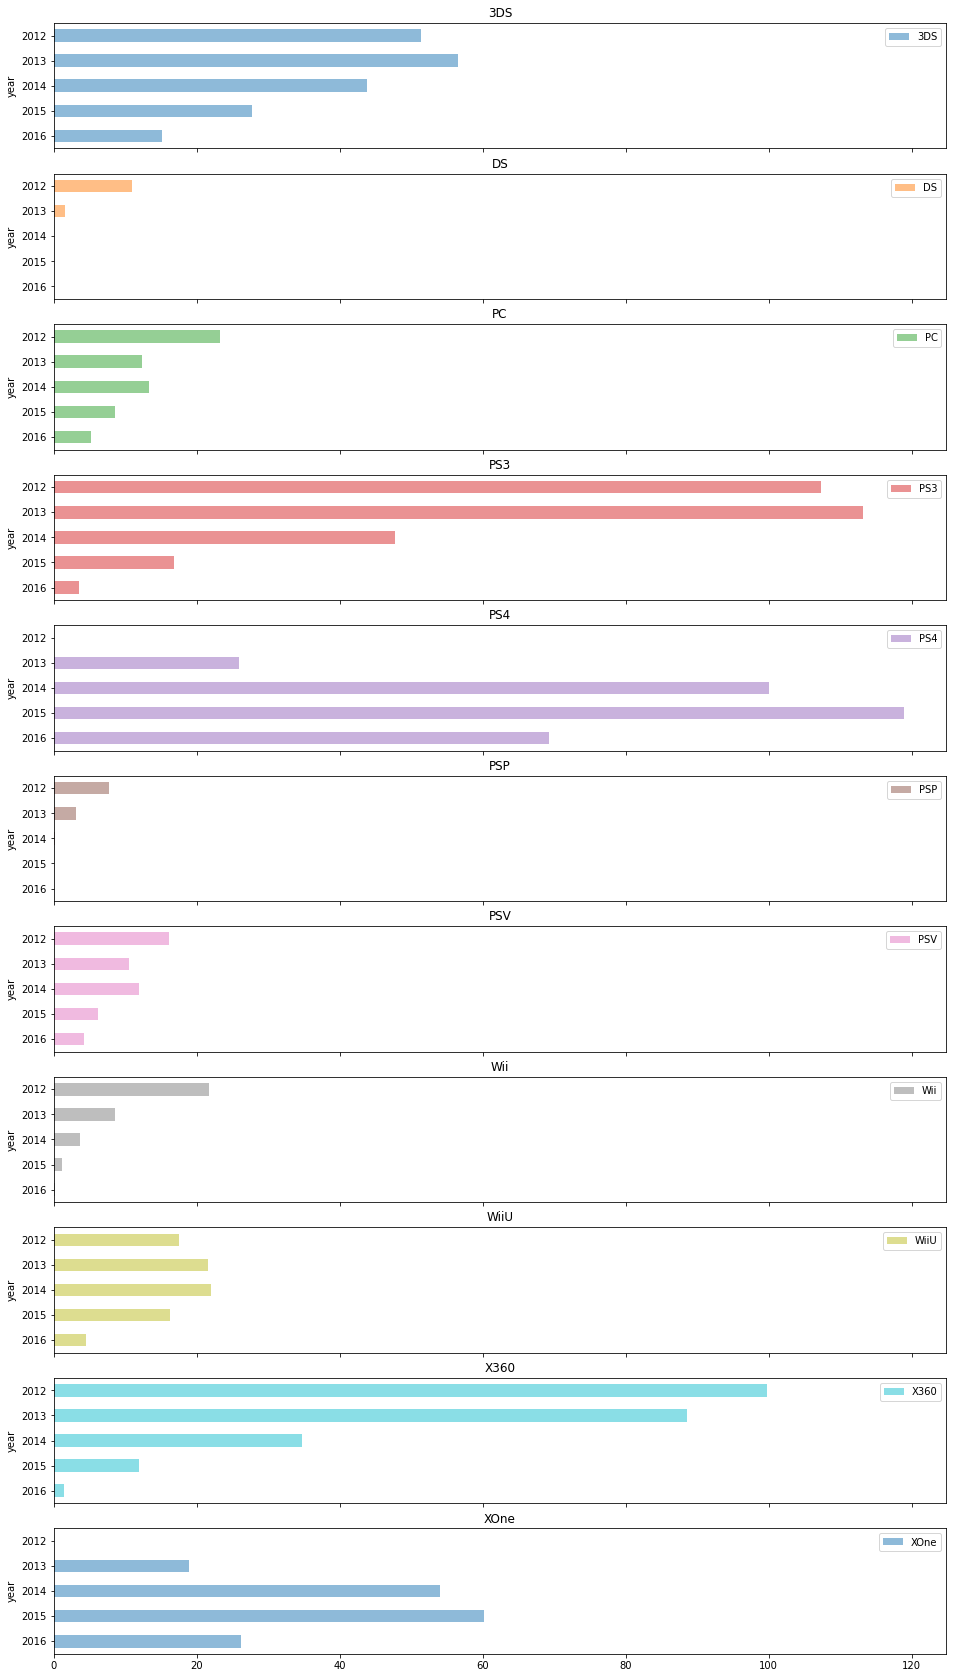

In [30]:
# графики продаж актуальных платформ по годам
axes = plt_actual.plot.barh(x='year', figsize=(
    16, 30), subplots=True, ylim=(0, 120), alpha=.5)

#### Вывод 

- наиболее перспективные платформы XOne, PS4, 3DS, PC, PSV, WiiU, остальные платформы уже плохо продаются в 2016 
- у всех платформ спад продаж

### График boxplot по глобальным продажам игр в разбивке по платформам

In [31]:
# талица для построения боксплота
plt_box = (df
           .query('year > 2011')
           .pivot_table(index='year',
                        values=['na_sales', 'eu_sales',
                                'jp_sales', 'other_sales'],
                        columns='platform',
                        aggfunc='sum')
           )
plt_box

eu_sales                                                             \
platform      3DS    DS     PC        PS3        PS4   PSP   PSV   Wii  WiiU   
year                                                                           
2012        11.68  2.68  12.40  39.049999        NaN  0.25  5.26  5.99  5.28   
2013        14.84  0.85   7.39  42.270000  11.050000  0.17  2.57  3.34  6.70   
2014         8.73   NaN   8.87  18.240000  46.500000  0.00  2.45  1.86  6.66   
2015         5.06   NaN   5.57   6.040000  51.760002  0.00  0.69  0.62  5.01   
2016         2.33   NaN   3.53   1.260000  31.780001   NaN  0.39  0.11  1.48   

                     ... other_sales                                      \
platform       X360  ...          DS    PC    PS3        PS4   PSP   PSV   
year                 ...                                                   
2012      32.000000  ...        0.59  2.81  16.49        NaN  0.13  2.54   
2013      27.030001  ...        0.12  1.11  17.40   3.870000  0.04  1.45   
2014      11.280000  ...         NaN  0.90   6.88  15.780000  0.00  1.34   
2015       3.500000  ...         NaN  0.59   2.12  18.459999  0.00  0.32   
2016       0.710000  ...         NaN  0.36   0.37  10.240000   NaN  0.15   

                                  
platform   Wii  WiiU  X360  XOne  
year                              
2012      1.49  1.26  8.29   NaN  
2013      0.72  1.53  7.76  1.75  
2014      0.30  1.68  3.13  4.81  
2015      0.09  1.13  1.10  5.47  
2016      0.01  0.35  0.12  2.24  

[5 rows x 44 columns]

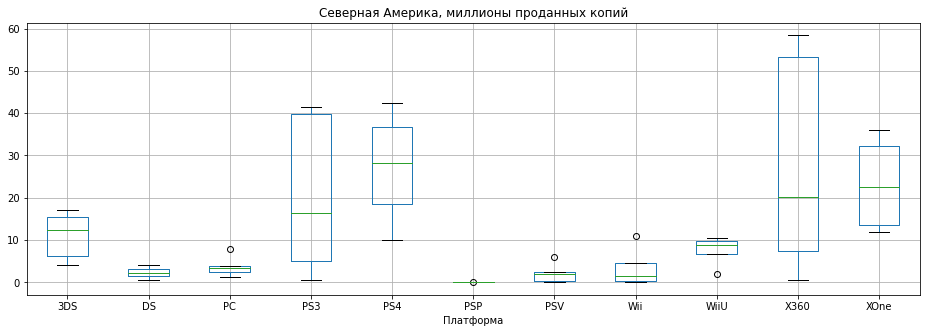

In [32]:
# боксплот региона сев америка
plt_box['na_sales'].boxplot(figsize=(16, 5))

plt.title('Северная Америка, миллионы проданных копий')
plt.xlabel('Платформа')
plt.show()

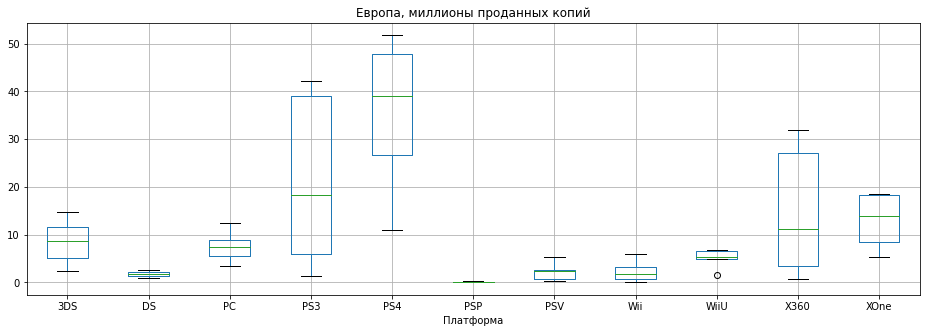

In [33]:
# боксплот региона европа
plt_box['eu_sales'].boxplot(figsize=(16, 5))

plt.title('Европа, миллионы проданных копий')
plt.xlabel('Платформа')
plt.show()

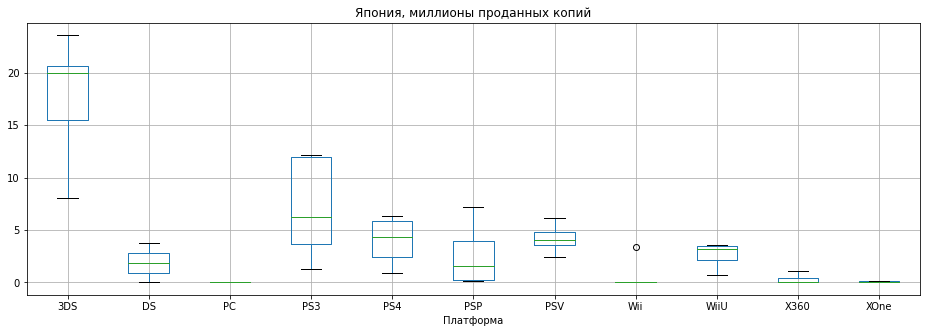

In [34]:
# боксплот японии
plt_box['jp_sales'].boxplot(figsize=(16, 5))

plt.title('Япония, миллионы проданных копий')
plt.xlabel('Платформа')
plt.show()

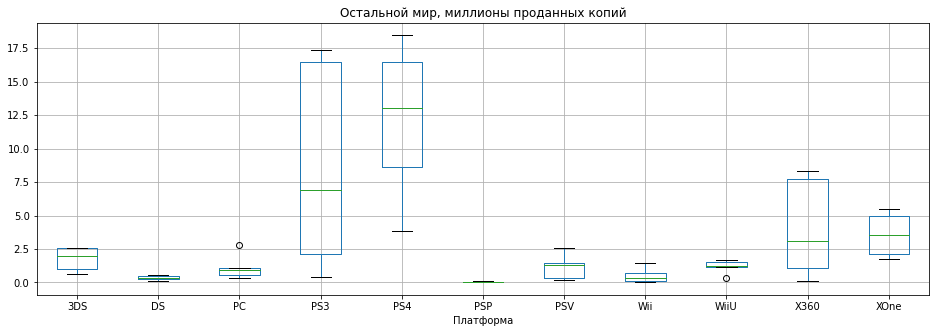

In [35]:
# боксплот остального мира
plt_box['other_sales'].boxplot(figsize=(16, 5))

plt.title('Остальной мир, миллионы проданных копий')
plt.xlabel('Платформа')
plt.show()

#### Вывод:

- рынок EU, NA и other_sales очень похожи, в них лидирует PS3, PS4, XOne, X360, 3DS
- JP сильно отличается от остального мира, самая популярная платформа 3DS
- NA лучше всего продается X360
- EU лучше всего продается PS4
- other_sales лучше всего продается PS3 и PS4
- JP лучше всего продается 3DS

### Влияние отзывов пользователей и критиков, на продажи PS4

In [36]:
# таблица корреляции пс4
PS4 = (actual_df
       .query('platform == "PS4"')
       [['critic_score', 'user_score', 'revenue']]
       )
PS4.corr()

,critic_score,user_score,revenue
critic_score,1.00000,0.900850,0.227550
user_score,0.90085,1.000000,0.113116
revenue,0.22755,0.113116,1.000000


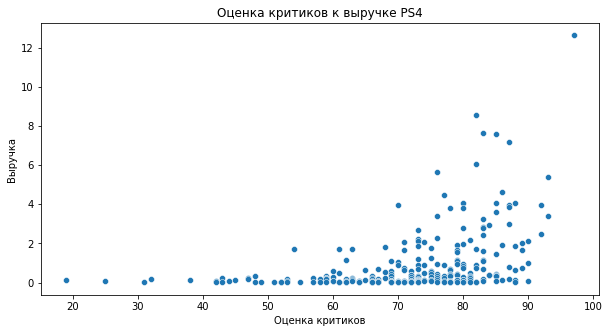

In [37]:
# диаграмма рассеяния оценка критиков к выручке пс4
plt.figure(figsize=(10, 5))
sns.scatterplot(data=PS4.query('critic_score > 0'),
                x="critic_score", y="revenue")

plt.title('Оценка критиков к выручке PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Выручка')
plt.show()

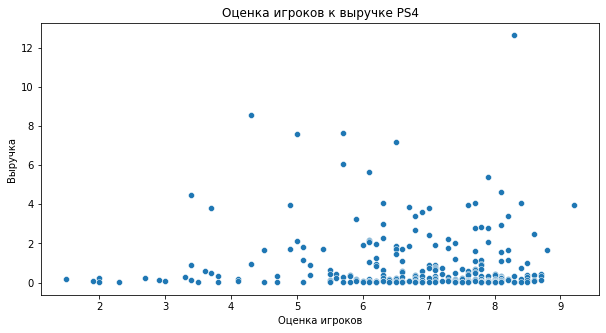

In [38]:
# диаграмма рассеяния оценка игроков к выручке пс4
plt.figure(figsize=(10, 5))
sns.scatterplot(data=PS4.query('user_score > 0'), x="user_score", y="revenue")

plt.title('Оценка игроков к выручке PS4')
plt.xlabel('Оценка игроков')
plt.ylabel('Выручка')
plt.show()

#### Вывод PS4:

- кореляции между оценками пользователей и выручкой - очень слабая, почти нет
- кореляции между оценками критиков и выручкой - очень слабая, почти нет

### Соотнесите выводы с продажами игр на других платформах.

In [39]:
# корреляция иксбокс1
XOne = (actual_df
        .query('platform == "XOne"')
        [['critic_score', 'user_score', 'revenue']]
        )
XOne.corr()

,critic_score,user_score,revenue
critic_score,1.000000,0.774153,0.274839
user_score,0.774153,1.000000,0.116563
revenue,0.274839,0.116563,1.000000


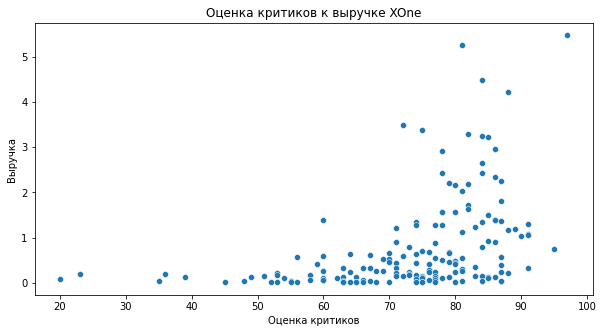

In [40]:
# диаграмма рассеяния оценка критиков к выручке иксбокс1
plt.figure(figsize=(10, 5))
sns.scatterplot(data=XOne.query('critic_score > 0'),
                x="critic_score", y="revenue")

plt.title('Оценка критиков к выручке XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Выручка')
plt.show()

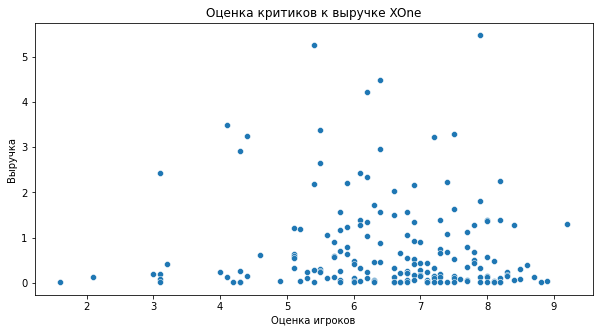

In [41]:
# диаграмма рассеяния оценка игроков к выручке иксбокс1
plt.figure(figsize=(10, 5))
sns.scatterplot(data=XOne.query('user_score > 0'), x="user_score", y="revenue")

plt.title('Оценка критиков к выручке XOne')
plt.xlabel('Оценка игроков')
plt.ylabel('Выручка')
plt.show()

#### Вывод по XOne:

- кореляции между оценками пользователей и выручкой - очень слабая, почти нет
- кореляции между оценками критиков и выручкой - слабая

In [42]:
# корреляция 3дс
threeDS = (actual_df
           .query('platform == "3DS"')
           [['critic_score', 'user_score', 'revenue']]
           )
threeDS.corr()

,critic_score,user_score,revenue
critic_score,1.000000,0.910943,0.150265
user_score,0.910943,1.000000,0.130156
revenue,0.150265,0.130156,1.000000


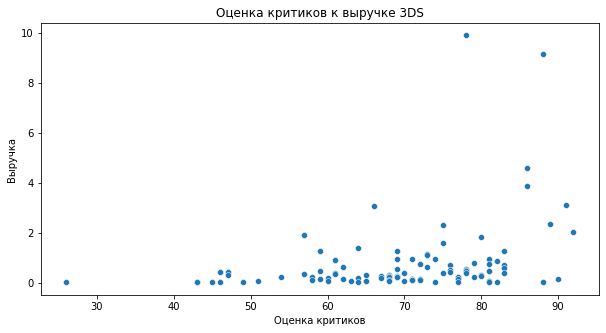

In [43]:
# диаграмма рассеяния оценка критиков к выручке 3дс
plt.figure(figsize=(10, 5))
sns.scatterplot(data=threeDS.query('critic_score > 0'),
                x="critic_score", y="revenue")

plt.title('Оценка критиков к выручке 3DS')
plt.xlabel('Оценка критиков')
plt.ylabel('Выручка')
plt.show()

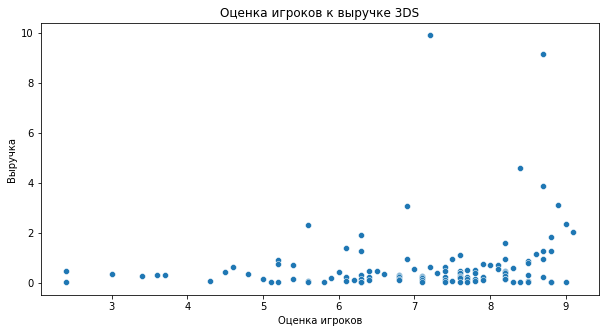

In [44]:
# диаграмма рассеяния оценка игроков к выручке 3дс
plt.figure(figsize=(10, 5))
sns.scatterplot(data=threeDS.query('user_score > 0'),
                x="user_score", y="revenue")

plt.title('Оценка игроков к выручке 3DS')
plt.xlabel('Оценка игроков')
plt.ylabel('Выручка')
plt.show()

#### Вывод по 3DS:

- кореляции между оценками пользователей и выручкой - очень слабая, почти нет
- кореляции между оценками критиков и выручкой - очень слабая, почти нет

In [45]:
# корреляция ПК
PC = (actual_df
      .query('platform == "PC"')
      [['critic_score', 'user_score', 'revenue']]
      )
PC.corr()

,critic_score,user_score,revenue
critic_score,1.000000,0.795932,0.204221
user_score,0.795932,1.000000,0.042202
revenue,0.204221,0.042202,1.000000


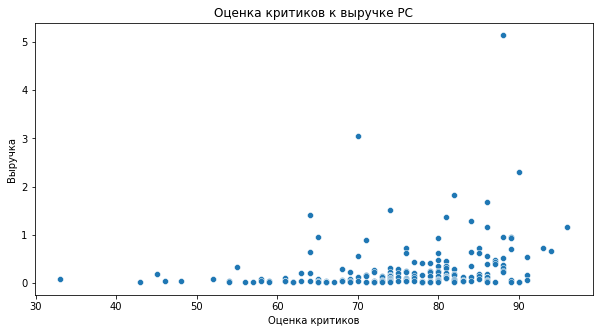

In [46]:
# диаграмма рассеяния оценка критиков к выручке ПК
plt.figure(figsize=(10, 5))
sns.scatterplot(data=PC.query('critic_score > 0'),
                x="critic_score", y="revenue")

plt.title('Оценка критиков к выручке PC')
plt.xlabel('Оценка критиков')
plt.ylabel('Выручка')
plt.show()

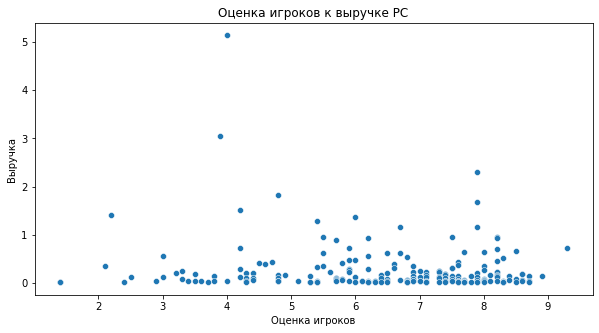

In [47]:
# диаграмма рассеяния оценка игроков к выручке ПК
plt.figure(figsize=(10, 5))
sns.scatterplot(data=PC.query('user_score > 0'), x="user_score", y="revenue")

plt.title('Оценка игроков к выручке PC')
plt.xlabel('Оценка игроков')
plt.ylabel('Выручка')
plt.show()

#### Вывод по PC:

- кореляции между оценками пользователей и выручкой - очень слабая, почти нет
- кореляции между оценками критиков и выручкой - очень слабая, почти нет

In [48]:
# корреляция ПСВ
PSV = (actual_df
       .query('platform == "PSV"')
       [['critic_score', 'user_score', 'revenue']]
       )
PSV.corr()

,critic_score,user_score,revenue
critic_score,1.000000,0.876066,0.395080
user_score,0.876066,1.000000,0.373038
revenue,0.395080,0.373038,1.000000


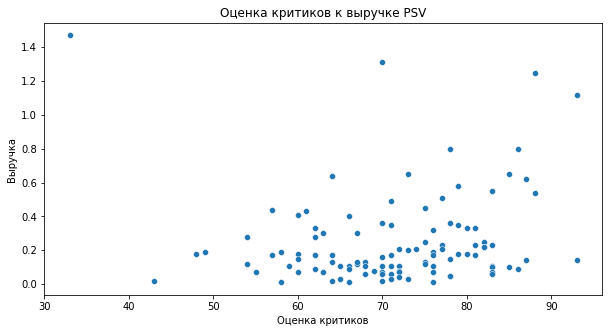

In [49]:
# диаграмма рассеяния оценка критиков к выручке ПСВ
plt.figure(figsize=(10, 5))
sns.scatterplot(data=PSV.query('critic_score > 0'),
                x="critic_score", y="revenue")

plt.title('Оценка критиков к выручке PSV')
plt.xlabel('Оценка критиков')
plt.ylabel('Выручка')
plt.show()

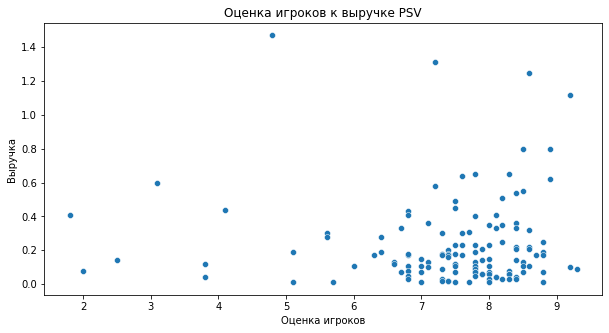

In [50]:
# диаграмма рассеяния оценка игроков к выручке ПСВ
plt.figure(figsize=(10, 5))
sns.scatterplot(data=PSV.query('user_score > 0'), x="user_score", y="revenue")

plt.title('Оценка игроков к выручке PSV')
plt.xlabel('Оценка игроков')
plt.ylabel('Выручка')
plt.show()

#### Вывод по PSV:

- кореляции между оценками пользователей и выручкой - средняя
- кореляции между оценками критиков и выручкой - средняя

In [51]:
# кореляция ВииЮ
WiiU = (actual_df
        .query('platform == "WiiU"')
        [['critic_score', 'user_score', 'revenue']]
        )
WiiU.corr()

,critic_score,user_score,revenue
critic_score,1.000000,0.861333,0.298124
user_score,0.861333,1.000000,0.271140
revenue,0.298124,0.271140,1.000000


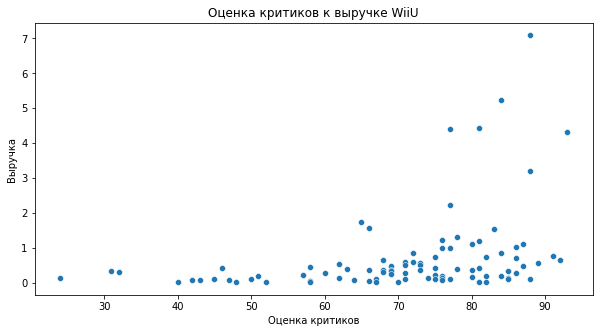

In [52]:
# диаграмма рассеяния оценка критиков к выручке ВииЮ
plt.figure(figsize=(10, 5))
sns.scatterplot(data=WiiU.query('critic_score > 0'),
                x="critic_score", y="revenue")

plt.title('Оценка критиков к выручке WiiU')
plt.xlabel('Оценка критиков')
plt.ylabel('Выручка')
plt.show()

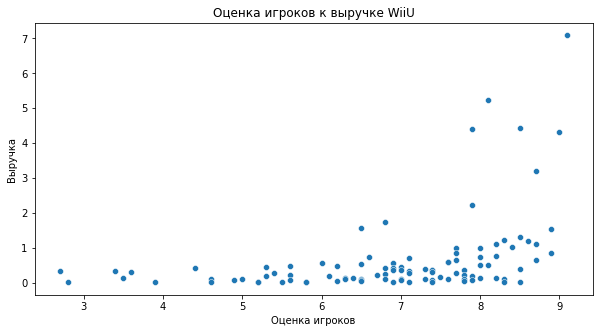

In [53]:
# диаграмма рассеяния оценка игроков к выручке ВииЮ
plt.figure(figsize=(10, 5))
sns.scatterplot(data=WiiU.query('user_score > 0'), x="user_score", y="revenue")

plt.title('Оценка игроков к выручке WiiU')
plt.xlabel('Оценка игроков')
plt.ylabel('Выручка')
plt.show()

#### Вывод по WiiU:

- кореляции между оценками пользователей и выручкой - слабая
- кореляции между оценками критиков и выручкой - слабая

#### Общий вывод:

- взаимосвязь между оценками критиков и игроков почти у всех платформа отсутсвует
- наблюдается слабая свзять у XOne между оценками критив и продажами
- у платформы PSV есть средняя зависимость между оценками от критиков и выручкой, а так же зависимость между оценками от игроков и выручкой

### Общее распределение игр по жанрам.

In [54]:
# таблица по жанрам и выруке по регионам
genre = (actual_df
         .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'revenue']]
         .median()
         .reset_index()
         .sort_values(by='revenue', ascending=False)
         )
genre

,genre,na_sales,eu_sales,jp_sales,other_sales,revenue
8,Shooter,0.20,0.170,0.00,0.05,0.440
10,Sports,0.08,0.050,0.00,0.02,0.240
4,Platform,0.09,0.080,0.00,0.02,0.210
6,Racing,0.04,0.090,0.00,0.02,0.140
7,Role-Playing,0.02,0.010,0.06,0.01,0.140
2,Fighting,0.05,0.020,0.03,0.01,0.130
0,Action,0.02,0.020,0.01,0.01,0.120
3,Misc,0.01,0.015,0.02,0.00,0.120
9,Simulation,0.00,0.030,0.00,0.01,0.120
11,Strategy,0.00,0.010,0.00,0.00,0.080


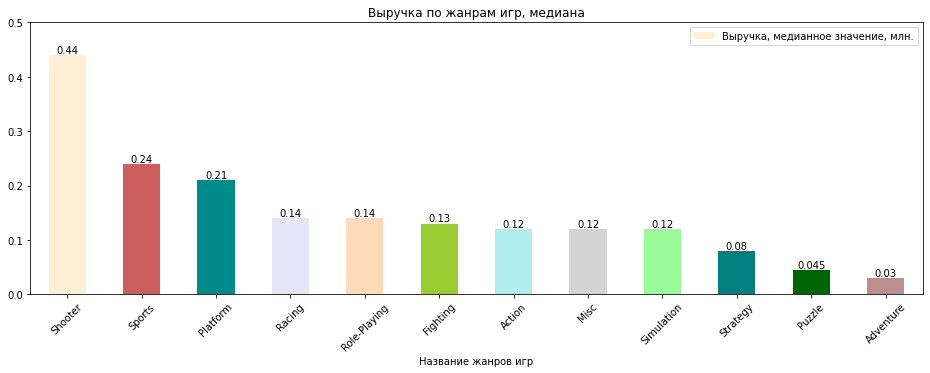

In [86]:
# график выручки по жанрам

all_colors = list(plt.cm.colors.cnames.keys())
n = genre['genre'].unique().__len__()+1
c = random.choices(all_colors, k=n)

genre.plot.bar(x='genre', y='revenue', figsize=(
    16, 5), color=c, rot=45, ylim=(0, 0.5))
for i, val in enumerate(genre['revenue'].values):
    plt.text(i, val, round(float(val), 3), horizontalalignment='center',
             verticalalignment='bottom', fontdict={'fontweight': 500, 'size': 10})


plt.title('Выручка по жанрам игр, медиана')
plt.legend(['Выручка, медианное значение, млн.'])
plt.xlabel('Название жанров игр')

plt.show()

#### Вывод:
- больше всего денег приносит Shooter, этот жанр самый популярный во всем мире
- второе мето делят Sports и Platform, с большим отрывом от первого. 
- Меньше всего денег приносят жанры Puzzle и Adventure
- В целом во всем мире предпочтения в жанрах схожи, исключение Японский рынок. Но смело можно сказать, что **жанр Shooter самый прибыльный**, а **Puzzle и Adventure собирают меньше всего денег**.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5).

In [56]:
# продажи платформ по регионам
top_plt = actual_df.groupby(
    'platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top_plt

,na_sales,eu_sales,jp_sales
platform,,,
3DS,55.310001,42.639999,87.790001
DS,4.590000,3.530000,3.720000
PC,19.120001,37.759998,0.000000
PS3,103.379997,106.860001,35.290001
PS4,108.739998,141.089996,15.960000
PSP,0.130000,0.420000,10.470000
PSV,10.980000,11.360000,21.039999
Wii,17.450001,11.920000,3.390000
WiiU,38.099998,25.129999,13.010000


In [57]:
# топ5 продаж платформ сев. америки
top_plt_na = top_plt['na_sales'].sort_values(ascending=False)
top_plt_na.reset_index().head(5)

,platform,na_sales
0,X360,140.050003
1,PS4,108.739998
2,PS3,103.379997
3,XOne,93.120003
4,3DS,55.310001


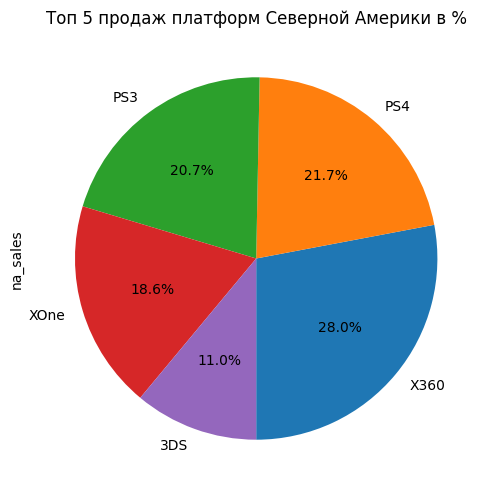

In [58]:
# диаграмма топ5 продаж платформ сев. америки
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(111)

top_plt_na.head(5).plot(kind='pie', ax=ax, autopct='%1.1f%%',
                        startangle=270, fontsize=10)
plt.title('Топ 5 продаж платформ Северной Америки в %')
plt.show()

Вывод:
- больше всего продаж у старой консоли х360

In [59]:
# топ5 продаж платформ европы
top_plt_eu = top_plt['eu_sales'].sort_values(ascending=False)
top_plt_eu.reset_index().head(5)

,platform,eu_sales
0,PS4,141.089996
1,PS3,106.860001
2,X360,74.519997
3,XOne,51.590000
4,3DS,42.639999


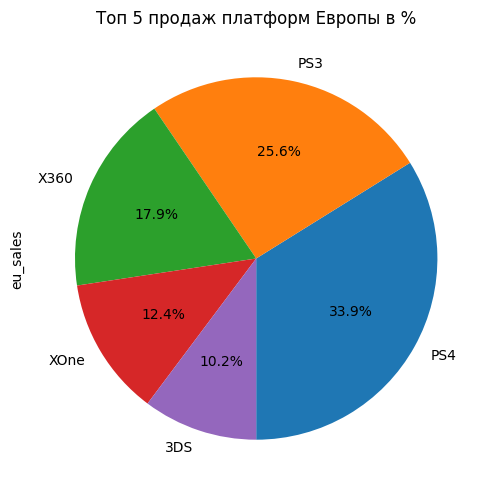

In [60]:
# диаграмма топ5 продаж платформ европы
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(111)
top_plt_eu.head(5).plot(kind='pie', ax=ax, autopct='%1.1f%%',
                        startangle=270, fontsize=10)
plt.title('Топ 5 продаж платформ Европы в %')
plt.show()

#### Вывод:
- самая большая выручка PS4

In [61]:
# топ5 продаж платформ японии
top_plt_jp = top_plt['jp_sales'].sort_values(ascending=False)
top_plt_jp.reset_index().head(5)

,platform,jp_sales
0,3DS,87.790001
1,PS3,35.290001
2,PSV,21.039999
3,PS4,15.960000
4,WiiU,13.010000


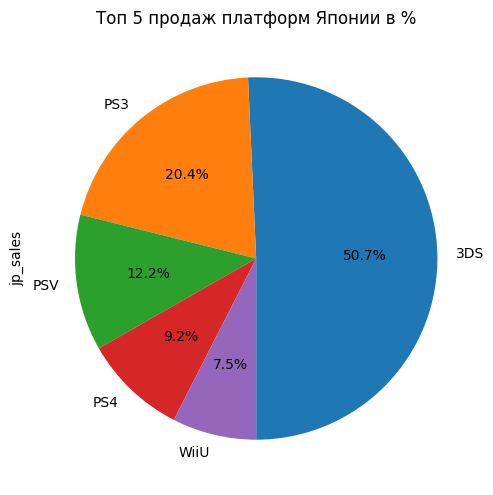

In [62]:
# диаграмма топ5 продаж платформ японии
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(111)
top_plt_jp.head(5).plot(kind='pie', ax=ax, autopct='%1.1f%%',
                        startangle=270, fontsize=10)
plt.title('Топ 5 продаж платформ Японии в %')
plt.show()

#### Вывод:
- лидер Японского рынка 3DS
- платформы xbox в японии продается мало

#### Общий вывод:
- рынок Японии сильно отличается, имеет своих лидеров, самая попялрная платформа 3DS
- рынки Европы и Америки очень похожи, топ5 это одни и те же платформы
- в Америке популярнее всех игры на старой платформе x360, перспективные платформы PS4 и XOne набирают популярность
- в Европе самая популярная платформа, перспективная PS4

### Самые популярные жанры (топ-5). Поясните разницу

In [63]:
# таблица жанров по регионам
top_genre = actual_df.groupby(
    'genre')[['na_sales', 'eu_sales', 'jp_sales']].mean()*10
top_genre

,na_sales,eu_sales,jp_sales
genre,,,
Action,1.724927,1.545490,0.512124
Adventure,0.295364,0.313245,0.272848
Fighting,1.815596,0.989908,0.866055
Misc,1.989062,1.370833,0.669792
Platform,2.985883,2.518823,1.015294
Puzzle,0.403571,0.500000,0.764286
Racing,1.497391,2.373044,0.217391
Role-Playing,1.729730,1.311622,1.768649
Shooter,6.160426,4.828511,0.392766


In [64]:
# жанры сев. америка
top_genre_na = top_genre['na_sales'].sort_values(ascending=False)

top_genre_na.reset_index().head(5)

,genre,na_sales
0,Shooter,6.160426
1,Sports,3.042164
2,Platform,2.985883
3,Misc,1.989062
4,Fighting,1.815596


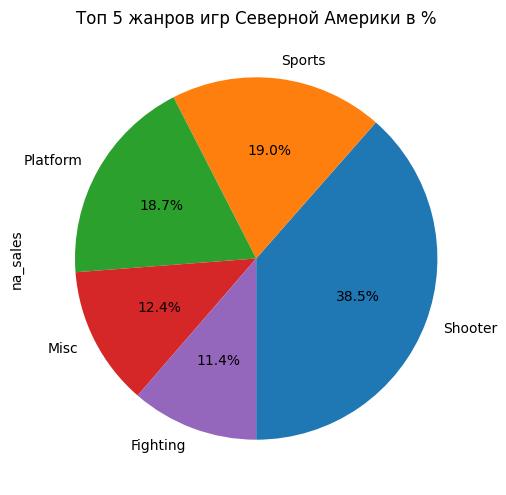

In [65]:
# диаграмма жанры сев. америка
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(111)
top_genre_na.head(5).plot(kind='pie', ax=ax,
                          autopct='%1.1f%%', startangle=270, fontsize=10)
plt.title('Топ 5 жанров игр Северной Америки в %')
plt.show()

#### Вывод:
- в Америке больше всего играют в Shooter

In [66]:
# жанры европа
top_genre_eu = top_genre['eu_sales'].sort_values(ascending=False)
top_genre_eu.reset_index().head(5)

,genre,eu_sales
0,Shooter,4.828511
1,Sports,2.577985
2,Platform,2.518823
3,Racing,2.373044
4,Simulation,1.818750


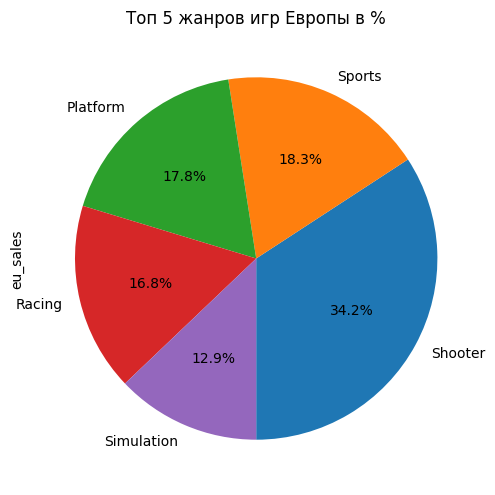

In [67]:
# жанры европа
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(111)
top_genre_eu.head(5).plot(kind='pie', ax=ax,
                          autopct='%1.1f%%', startangle=270, fontsize=10)
plt.title('Топ 5 жанров игр Европы в %')
plt.show()

#### Вывод:
- в Европе больше всего играют в Shooter

In [68]:
# жанры япония
top_genre_jp = top_genre['jp_sales'].sort_values(ascending=False)
top_genre_jp.reset_index().head(5)

,genre,jp_sales
0,Role-Playing,1.768649
1,Simulation,1.301250
2,Platform,1.015294
3,Fighting,0.866055
4,Puzzle,0.764286


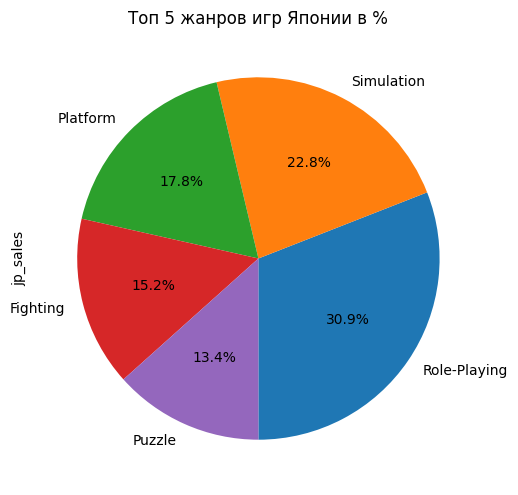

In [69]:
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(111)
top_genre_jp.head().plot(kind='pie', ax=ax, autopct='%1.1f%%',
                         startangle=270, fontsize=10)
plt.title('Топ 5 жанров игр Японии в %')
plt.show()

#### Вывод:
- в Японии играют в Role-Playing 

#### Общий вывод:
- в Америке и Европе любят играть в Shooter
- рынки Европы и Америки очень похожи, лидеры Shooter и Sports
- Японский рынок очень сильно отличается, лидируют Role-Playing

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [70]:
# словарь названия игры и esrb
df_dict = df[['name', 'rating']]
df_dict.head()

,name,rating
0,Wii Sports,E
1,Super Mario Bros.,NaN
2,Mario Kart Wii,E
3,Wii Sports Resort,E
4,Pokemon Red/Pokemon Blue,NaN


In [71]:
# удаление пропусков и дубликатов
df_dict = df_dict.drop_duplicates()
df_dict = df_dict.dropna().reset_index(drop=True)
df_dict.head()

,name,rating
0,Wii Sports,E
1,Mario Kart Wii,E
2,Wii Sports Resort,E
3,New Super Mario Bros.,E
4,Wii Play,E


In [72]:
# джоин таблиц и словаря, удалось восстановить около 400 пропусков
df = df.merge(df_dict, on='name', how='outer')
df.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_x,revenue,rating_y
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993,E
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,0.0,0.0,NaN,40.240002,NaN
2,Super Mario Bros.,GB,1999,Platform,3.400000,1.300000,0.15,0.22,0.0,0.0,NaN,5.070000,NaN
3,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000,E
4,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000,E


In [73]:
# убрал лишню колонку со старым рейтингом
df = df[['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
         'other_sales', 'critic_score', 'user_score', 'revenue', 'rating_y']]

In [74]:
# переимновал колонку
df = df.rename(columns={'rating_y': 'rating'})
df.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,revenue,rating
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,82.539993,E
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,0.0,0.0,40.240002,NaN
2,Super Mario Bros.,GB,1999,Platform,3.400000,1.300000,0.15,0.22,0.0,0.0,5.070000,NaN
3,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,35.520000,E
4,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,32.770000,E


In [75]:
# заполнил оставшиеся пропуски, создание таблицы esrb
ESRB = df.query('year > 2011').fillna('zero').groupby(
    'rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
ESRB

,na_sales,eu_sales,jp_sales
rating,,,
E,124.050003,119.139999,29.379999
E10+,79.209999,58.209999,8.710000
M,242.240005,205.949997,22.350000
T,69.830002,57.040001,29.129999
zero,83.300003,70.510002,103.260002


**расшифровка значений ESRB**

    E - любой возраст
    Е10+ - от 10 и старше
    Т - от 13 и старше
    М - от 17 и старше

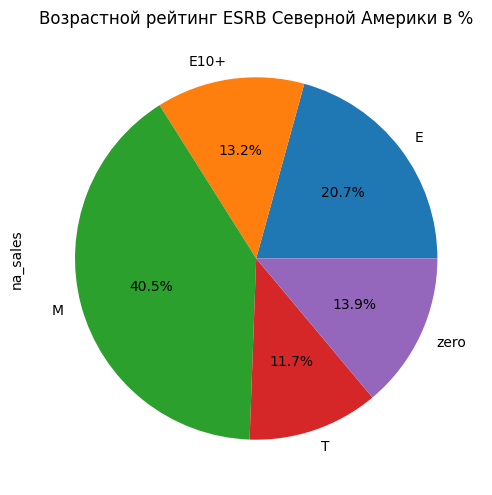

In [76]:
# рейтинг сев. америки
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(111)
ESRB['na_sales'].plot(kind='pie', ax=ax, autopct='%1.1f%%', fontsize=10)
plt.title('Возрастной рейтинг ESRB Северной Америки в %')
plt.show()

#### Вывод:
- больше всего денег принес рейтинг М - от 17 и старше

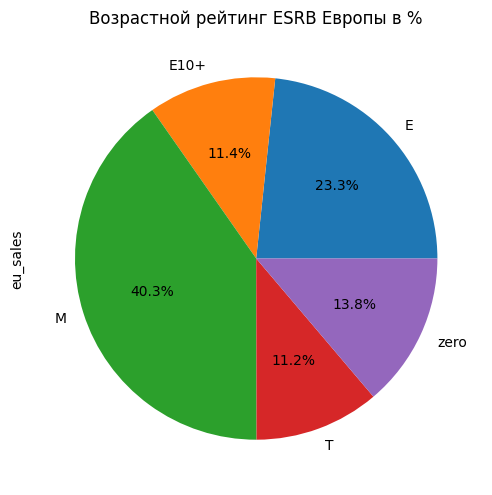

In [77]:
# рейтинг европы
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(111)
ESRB['eu_sales'].plot(kind='pie', ax=ax, autopct='%1.1f%%',  fontsize=10)
plt.title('Возрастной рейтинг ESRB Европы в %')
plt.show()

#### Вывод:
- больше всего денег принес рейтинг М - от 17 и старше

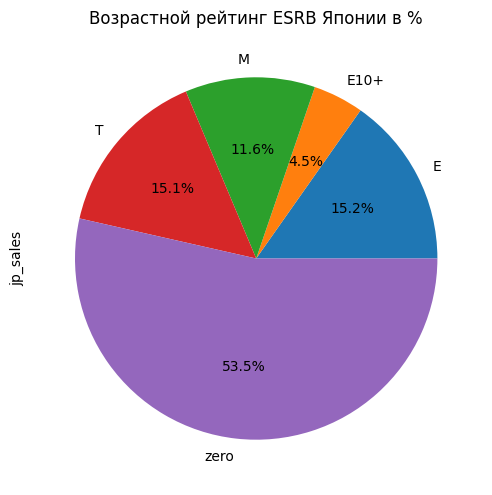

In [78]:
# рейтинг японии
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(111)
ESRB['jp_sales'].plot(kind='pie', ax=ax, autopct='%1.1f%%', fontsize=10)
plt.title('Возрастной рейтинг ESRB Японии в %')
plt.show()

#### Вывод:
- лидер по продажам пропущенные значения, скорее всего игры которые без возрастного рейтинга никогда не покидали Японию и не попали в ESRB

#### Общий вывод:
- больше всего денег приносит в Европе и сев. Америке рейтинг М
- больше всего денег приносит в Японии, японские внутренние игры
- рынки Европы и сев. Америки одинаковые

## Проверка гипотез

### проверить гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [79]:
# удаляем 0 значения
t_test = actual_df.loc[actual_df['user_score'] != 0]
t_test.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.049999
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.270000
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.789999
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.679999
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001


Метод проверки гипотез: t-test, так как нам нужно средние двух генеральных совокупностей между собой.

**H0**: cредние пользовательские **рейтинги платформ Xbox One и PC разные**

**H1**: cредние пользовательские **рейтинги платформ Xbox One и PC одинаковые**

In [80]:
# проверка гипотезы
alpha = .05

results = st.ttest_ind(
    t_test.query('platform == "XOne"')['user_score'],
    t_test.query('platform == "PC"')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535102808074094
Не получилось отвергнуть нулевую гипотезу


#### Вывод:

Не получилось отвергнуть нулевую гипотезу. 

У нас есть основания утверждать, что cредние пользовательские рейтинги платформ Xbox One и PC разные.

### проверить гипотезу:  cредние пользовательские рейтинги жанров Action и Sports разные.

**H0**: cредние пользовательские **рейтинги жанров Action и Sports одинаковые**

**H1**: cредние пользовательские **рейтинги жанров Action и Sports разные**

In [81]:
# проверка гипотезы
alpha = .05

results = st.ttest_ind(
    t_test.query('genre == "Action"')['user_score'],
    t_test.query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7160944611827317e-26
Отвергаем нулевую гипотезу


#### Вывод:

Отвергаем нулевую гипотезу. 

У нас есть основания утверждать, что cредние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод:

**Самые прибыльные** года пришлись на **2008 - 739 млн. проданных копий**. и **2009 - 718 млн. проданных копий**, было выпущего самое большое **колличество игр**, более **1000 шт** в каждом. 

В 2012 году мы видим резкий спад по колличеству выпускаемых игр, колличество проданных игр при этом остается достаточно выскоим. Резкий спад по продажам наблюдается в 2016 году, игр выпущенно окло 350 шт, а проданных копий не более 150 млн. шт., что в 2 раза меньше чем за 2015 год.

Для прогноза на 2017 год, были взяты данные начиная с 2012. В период с 2012 до 2016, где ситуация с выпуском колличества игр выравнилась после большого спада, а выручка более менее на одном уровне. Искючение спад продаж в 2016.

С момента старта продаж новой консоли и ухода ее с рынка проходит около 10 лет. В начале платформа показывает малое колличество продаж (исключение Wii). Возможно это связано с тем, что старт продаж начинается зимой перед новым годом. На рекламные компании Wii стоит обратить внимание.

Наиболее **перспективные платформы  1 - PS4, 2 - XOne, 3 - 3DS**. PC, PSV, WiiU так же могу хорошо продаваться. Другие платформы плохо продаются в 2016, следует ожидать что в 2017 они будут продаваться еще хуже. 

Отзывы критиков и оценки пользоателей в основном имеют слабую зависимость к колличеству проданных копий. Исключение это платформа PSV, у нее есть средняя зависимость между оценками от критиков и выручкой, а так же зависимость между оценками от игроков и выручкой.

**Больше всего денег приносит Shooter, этот жанр самый популярный в Америке и Европе**, на **втором месте Sports**. Причем в **Японии** шутеры денег не приносят, там играют в **Role-Playing**. Меньше всего денег приносят жанры Puzzle и Adventure. В целом во всем мире предпочтения в жанрах схожи, **исключение Японский рынок**. Но смело можно сказать, что жанр Shooter самый прибыльный.

## Рекомендации на 2017 по регионам:

**Северная Америка** (критерии потенциально популярного продукта):


- PS4, XOne, 3DS, WiiU, PC - самые перспективные и популяные платформы


- Shooter, Sports, Platform, Misc, Fighting - самые продаваемые жанры


- Самые покупаемые игры по рейтингу ESRB, имеют ретинг М(17+)

**Европа** (критерии потенциально популярного продукта):


- PS4, XOne, 3DS, PC, WiiU - самые перспективные и популяные платформы 


- Shooter, Sports, Platform, Racing, Simulation - самые продаваемые жанры


- Самые покупаемые игры по рейтингу ESRB, имеют ретинг М(17+)

**Япония** (критерии потенциально популярного продукта):


- 3DS, PSV, PS4, WiiU - самые перспективные и популяные платформы 


- Role-Playing, Simulation, Platform, Fighting, Puzzle - самые продаваемые жанры


- Больше всего покупают местные игры, без рейтинга ESRB